In [122]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Get defined company data stock history

In [123]:
def get_ticker_data(ticker):
    """
    Fetch historical stock data for a given ticker symbol.
    """
    stock = yf.Ticker(ticker)
    data = stock.history(period="24mo", interval="1d")
    return data

In [124]:
data = get_ticker_data("AAPL")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-03 00:00:00-04:00,191.859062,191.958076,189.859082,190.552155,31458200,0.0,0.0
2023-07-05 00:00:00-04:00,189.670961,191.066972,188.730366,189.433334,46920300,0.0,0.0
2023-07-06 00:00:00-04:00,187.958112,190.116510,187.324457,189.908585,45094300,0.0,0.0
2023-07-07 00:00:00-04:00,189.512539,190.760043,188.354139,188.789764,46778000,0.0,0.0
2023-07-10 00:00:00-04:00,187.383846,188.106620,185.185852,186.740295,59922200,0.0,0.0


# data Visualization

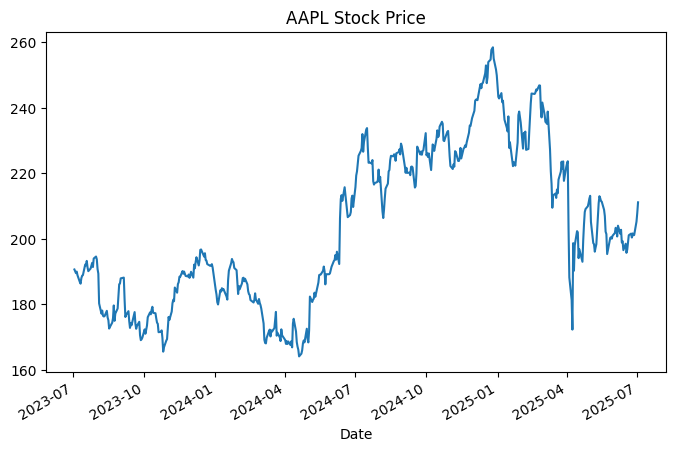

In [125]:
data['Close'].plot(figsize=(8, 5))
plt.title('AAPL Stock Price')
plt.show()

In [126]:
data = data.reset_index()
data['days'] = np.arange(len(data))

# Data split

In [127]:
x = data.drop(columns=['Close','Date'])
y = data['Close']

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=False)

In [129]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [130]:
y_pred_LR = model_LR.predict(x_test)

In [131]:
y_pred_LR

array([232.34516199, 229.35237826, 228.26962076, 233.4764855 ,
       235.20175073, 239.97210821, 244.32545412, 243.06740007,
       244.55403534, 245.8555471 , 247.36100001, 247.45211023,
       247.09344748, 240.81107604, 239.93985556, 235.69992538,
       239.13870962, 237.10240796, 231.52439137, 236.04246587,
       239.62520749, 227.21471328, 220.300297  , 217.25164823,
       210.78294171, 211.91795586, 212.18801225, 212.86119776,
       217.26783142, 215.28681027, 216.61662031, 219.47091398,
       222.84101289, 222.38837979, 223.54868296, 220.29210438,
       222.93177316, 222.12748523, 224.09829941, 203.35689254,
       193.02286764, 187.6654875 , 175.81600875, 193.30812616,
       188.3799145 , 196.23731403, 204.41345373, 201.49403554,
       195.52481677, 196.28315931, 191.01863517, 200.17450366,
       205.0371705 , 206.42584353, 208.8687063 , 209.23924966,
       211.21705414, 210.55221655, 213.07716346, 203.38004437,
       199.97688473, 199.12622321, 194.71005459, 197.16

In [132]:
mse_LR = mean_squared_error(y_test, y_pred_LR)
mae_LR = mean_absolute_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print(f"LinearRegression Mean Squared Error: {mse_LR:.2f}")
print(f"LinearRegression Mean Absolute Error: {mae_LR:.2f}")
print(f"LinearRegression R2 Score: {r2_LR:.2f}")

LinearRegression Mean Squared Error: 2.95
LinearRegression Mean Absolute Error: 1.25
LinearRegression R2 Score: 0.99


In [133]:
model_xgb = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.05,max_depth=5, random_state=42)
model_xgb.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [134]:
y_pred_xgb = model_xgb.predict(x_test)

In [135]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost Mean Absolute Error: {mae_xgb:.2f}")
print(f"XGBoost R2 Score: {r2_xgb:.2f}")

XGBoost Mean Squared Error: 10.02
XGBoost Mean Absolute Error: 2.27
XGBoost R2 Score: 0.96


In [136]:
joblib.dump(model_xgb, "model_XGB.pkl")

['model_XGB.pkl']

In [137]:
data.shape

(502, 9)

In [138]:
last_row = x.iloc[-1]
future_rows = []
for i in range(1, 8):
    row = last_row.copy()
    row['days'] = len(data) + i - 1
    future_rows.append(row)
future_x = pd.DataFrame(future_rows)
predict_data = model_xgb.predict(future_x)

In [139]:
predict_data

array([212.97661, 212.97661, 212.97661, 212.97661, 212.97661, 212.97661,
       212.97661], dtype=float32)